In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import model 
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from glob import glob
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [3]:

import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
for dirname, _, filenames in os.walk('c:/Users/jadha/Data/fish_pak'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (1) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (1).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (10) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (10).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (11) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (11).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (12) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (12).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (13) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (13).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (14) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (14).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (15) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (15).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (16) - Copy.JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (16).JPG
c:/Users/jadha/Data/fish_pak\Catla\Catla-Body (17) - Copy.JPG
c:/U

In [5]:
train_dir = 'c:/Users/jadha/Data/fish_pak/'

In [6]:
fish = []
fish_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fish.append(i) # name of the fish
        fish_image.append(i + '/' + image_filename) # image of the fish

In [7]:
train_fish= pd.DataFrame(fish, columns=["fish"])
train_fish["fish_image"] = fish_image

In [8]:
train_fish

,fish,fish_image
0,Catla,Catla/Catla-Body (1) - Copy.JPG
1,Catla,Catla/Catla-Body (1).JPG
2,Catla,Catla/Catla-Body (10) - Copy.JPG
3,Catla,Catla/Catla-Body (10).JPG
4,Catla,Catla/Catla-Body (11) - Copy.JPG
...,...,...
325,Silver,Silver/Silver-Body (5).JPG
326,Silver,Silver/Silver-Body (6).JPG
327,Silver,Silver/Silver-Body (7).JPG
328,Silver,Silver/Silver-Body (8).JPG


In [9]:
train_fish.shape

(330, 2)

In [10]:
train_fish['fish'].value_counts()

Rohu               73
mori               70
Catla              57
Cyprinus carpio    50
Silver             47
Grass Carp         33
Name: fish, dtype: int64

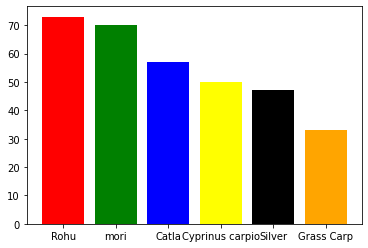

In [11]:
plt.bar(x=train_fish['fish'].value_counts().keys(),
        height=train_fish['fish'].value_counts().values,
        color=['red','green','blue','yellow','k','orange']);

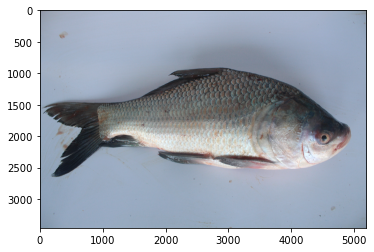

In [12]:
img=plt.imread(train_dir+'Catla/Catla-Body (1) - Copy.JPG')
plt.imshow(img);

In [13]:
img.shape

(3456, 5184, 3)

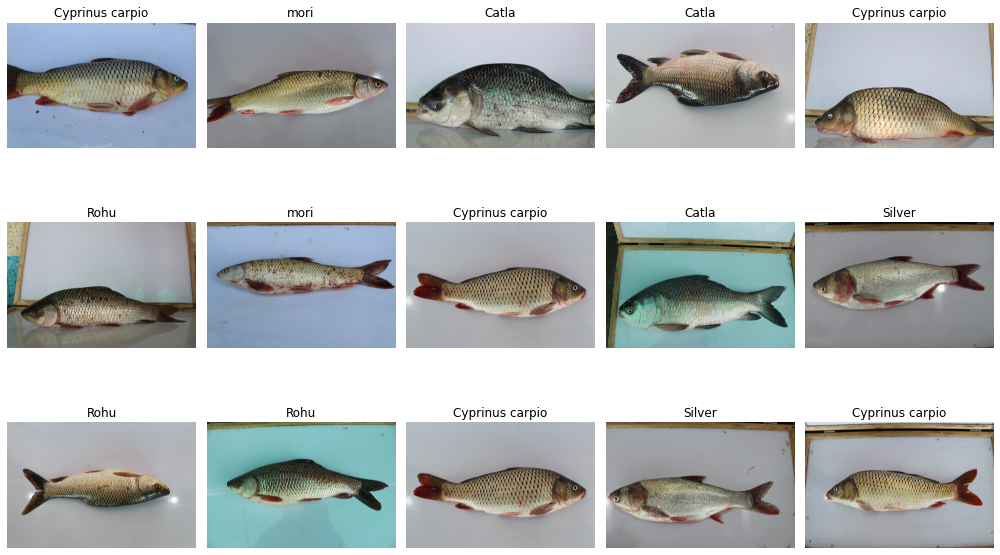

In [14]:
plt.figure(figsize=[14,9])
for i in range (1,16):
    plt.subplot(3,5,i)
    k=np.random.randint(0,330)
    img=plt.imread(train_dir+train_fish["fish_image"][k])
    plt.imshow(img)
    plt.title(train_fish["fish"][k])
    plt.axis('off')
plt.tight_layout()

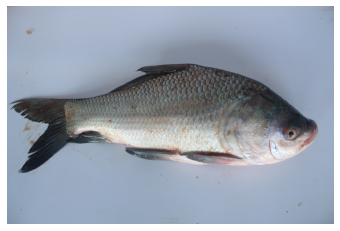

In [15]:
img = load_img(train_dir + "Catla/Catla-Body (1) - Copy.JPG")
plt.imshow(img)
plt.axis("off")
plt.show()

In [16]:
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (3456, 5184, 3)


In [17]:
fishCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fishCountUnique)
print("How many different fish are there  -->  ",numberOfClass)

How many different fish are there  -->   6


In [37]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (256,256,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(24))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 activation_5 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [38]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [39]:
# model.compile(loss = "categorical_crossentropy",
#               optimizer = "rmsprop",
#               metrics = ["accuracy"])

In [40]:
print("Target Size --> ", array_image.shape[:2])

Target Size -->  (3456, 5184)


In [41]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

In [42]:
epochs = 50
batch_size = 16

In [43]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (256,256),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 330 images belonging to 6 classes.


In [44]:
train_generator.class_indices

{'Catla': 0,
 'Cyprinus carpio': 1,
 'Grass Carp': 2,
 'Rohu': 3,
 'Silver': 4,
 'mori': 5}

In [45]:
(train_generator[0][0][0]).shape

(256, 256, 3)

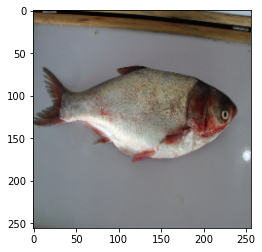

In [46]:
plt.imshow(train_generator[0][0][0])

In [47]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (16, 256, 256, 3)
labels_batch shape -->  (16, 6)


In [50]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=epochs)

Epoch 1/50
21/21 [==============================] - 81s 4s/step - loss: 1.0038 - accuracy: 0.6182
Epoch 2/50
21/21 [==============================] - 81s 4s/step - loss: 0.8928 - accuracy: 0.6333
Epoch 3/50
21/21 [==============================] - 83s 4s/step - loss: 0.9531 - accuracy: 0.6030
Epoch 4/50
21/21 [==============================] - 85s 4s/step - loss: 0.8821 - accuracy: 0.6333
Epoch 5/50
21/21 [==============================] - 84s 4s/step - loss: 0.8864 - accuracy: 0.6424
Epoch 6/50
21/21 [==============================] - 81s 4s/step - loss: 0.8630 - accuracy: 0.6273
Epoch 7/50
21/21 [==============================] - 83s 4s/step - loss: 0.8514 - accuracy: 0.6697
Epoch 8/50
21/21 [==============================] - 82s 4s/step - loss: 0.9128 - accuracy: 0.6939
Epoch 9/50
21/21 [==============================] - 82s 4s/step - loss: 0.8606 - accuracy: 0.7000
Epoch 10/50
21/21 [==============================] - 79s 4s/step - loss: 0.9242 - accuracy: 0.6424
Epoch 11/50
21/21 [

In [51]:
model.evaluate(train_generator)

21/21 [==============================] - 70s 3s/step - loss: 0.2562 - accuracy: 0.9212


[0.2562025487422943, 0.9212121367454529]

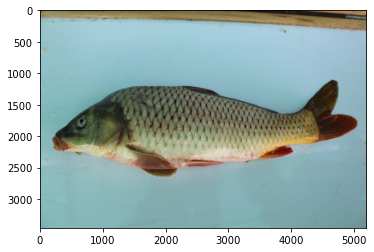

In [92]:
fish_img=plt.imread("c:/Users/jadha/Data/fish_pak_test/Gulfaam-Body (46).JPG")
plt.imshow(fish_img)
plt.show()

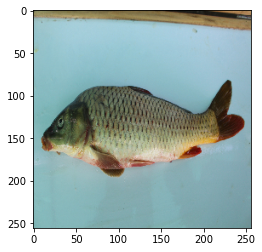

In [93]:
fish_img=cv2.resize(fish_img,(256,256))
plt.imshow(fish_img)
plt.show()

In [94]:
fish_img.shape

(256, 256, 3)

In [95]:
fish_img=fish_img.reshape(256,256,3)

In [96]:
fish_img.shape

(256, 256, 3)

In [97]:
x=img_to_array(fish_img)
x=np.expand_dims(x,axis=0)

In [98]:
model.predict(x)

1/1 [==============================] - 0s 28ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [99]:
fish_classes=['Catla','Cyprinus carpio','Grass Carp','Rohu','Silver','mori']
pridicted_fish=fish_classes[np.argmax(model.predict(x)[0])]
pridicted_fish

1/1 [==============================] - 0s 27ms/step


'Cyprinus carpio'